In [1]:
import os
os.chdir("../")

In [2]:
import matplotlib.pyplot as plt

from my_utils.markov_process import MP, MRP, MDP
from my_utils.policy import RandPolicy, DetPolicy

from my_utils.frog_mdp import FrogMDP, f, generate_transitions_rewards, get_frog_mdp
from my_utils.randomwalk import RWMDP, g, GetRWPolicyRewards, get_rw_mdp

from my_utils.td_lambda import TDLambda, GetValueTDLambda, decay, GetValueBackwardTDLambda

In [3]:
n = 10
mdp, policy = get_rw_mdp(n)
rl = TDLambda(policy, mdp.states, mdp.gamma)

In [4]:
V, Vhisto= GetValueTDLambda(mdp, rl, online = True, nIter=500)
print(V)

defaultdict(<class 'int'>, {2: 0.019480222560671837, 3: 0.03869321077750194, 1: 0.02025564991955137, 0: 0, 4: 0.04486889933904703, 5: 0.052909755632545255, 6: 0.062266865180221925, 7: 0.06997291791831263, 8: 0.07759013757828034, 9: 0.13036278794080403, 10: 0})


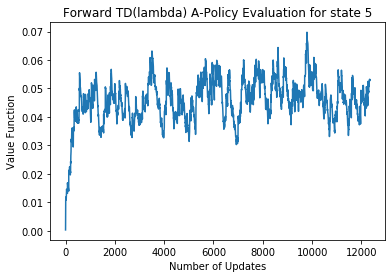

In [5]:
state = n//2
plt.plot([i for i in range(len(Vhisto[state]))], Vhisto[state])
plt.xlabel('Number of Updates')
plt.ylabel('Value Function')
plt.title('Forward TD(lambda) A-Policy Evaluation for state {0}'.format(state))
plt.show()

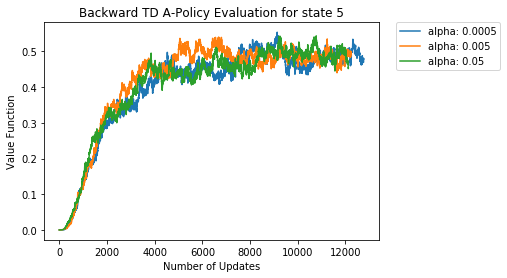

In [8]:
alphas = [0.0005,0.005, 0.05]
for alpha in alphas:
    rl = TDLambda(policy, mdp.states, mdp.gamma)
    V, Vhisto = GetValueBackwardTDLambda(mdp, rl, lbda = 0.99, online = True, alpha = 0.005, nIter=500)
    state = n//2
    plt.plot([i for i in range(len(Vhisto[state]))], Vhisto[state], label="alpha: {0:.2}".format(alpha))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Number of Updates')
plt.ylabel('Value Function')
plt.title('Backward TD A-Policy Evaluation for state {0:.0f}'.format(state))
plt.show()

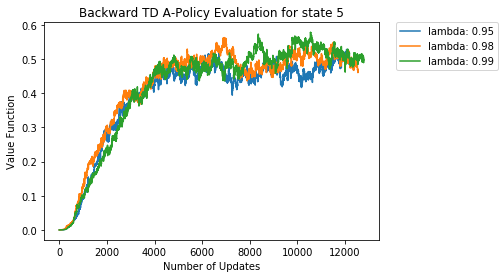

In [11]:
alpha = 0.005
lbdas = [0.95, 0.98, 0.99]
for lbda in lbdas:
    rl = TDLambda(policy, mdp.states, mdp.gamma)
    V, Vhisto = GetValueBackwardTDLambda(mdp, rl, lbda = 0.99, online = True, alpha = 0.005, nIter=500)
    state = n//2
    plt.plot([i for i in range(len(Vhisto[state]))], Vhisto[state], label="lambda: {0:.2}".format(lbda))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Number of Updates')
plt.ylabel('Value Function')
plt.title('Backward TD A-Policy Evaluation for state {0:.0f}'.format(state))
plt.show()

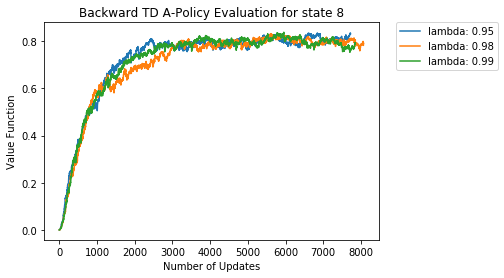

In [13]:
alpha = 0.005
lbdas = [0.95, 0.98, 0.99]
for lbda in lbdas:
    rl = TDLambda(policy, mdp.states, mdp.gamma)
    V, Vhisto = GetValueBackwardTDLambda(mdp, rl, lbda = 0.99, online = True, alpha = 0.005, nIter=500)
    state = n-2
    plt.plot([i for i in range(len(Vhisto[state]))], Vhisto[state], label="lambda: {0:.2}".format(lbda))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Number of Updates')
plt.ylabel('Value Function')
plt.title('Backward TD A-Policy Evaluation for state {0:.0f}'.format(state))
plt.show()